In [57]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,validation_curve, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.decomposition import PCA

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import seaborn as sns
import fasteda
import plotly.graph_objects as go 
import xgboost as xgb
%matplotlib inline

In [3]:
df = pd.read_excel('full_data.xlsx')
df.head()

,Time,Geothermal,Solar,Wind,Other Renewables,Hydro,Combustible Renewables,"Coal, Peat and Manufactured Gases",Natural Gas,Oil and Petroleum Products,Other Combustible Non-Renewables,UNMPR,Price(EUR/GWh)
0,2016-01-01,1326.789,3351.967,35628.395,41.2,55023.687,16494.803,70313.116,59978.891,5455.079,2205.095,9.7,0.037164
1,2016-02-01,1256.233,4901.266,36277.080,41.2,55934.777,14830.339,60901.101,50334.148,4437.139,2066.531,9.6,0.027102
2,2016-03-01,1354.394,8047.000,27362.268,41.2,57546.386,15801.635,63693.955,53420.475,4432.972,2127.367,9.5,0.027581
3,2016-04-01,1282.061,11269.077,24661.307,41.2,56949.051,13866.405,53587.305,46547.237,3778.374,1991.104,9.4,0.027452
4,2016-05-01,1285.947,13493.892,23264.017,41.2,55841.288,13681.785,50761.393,42774.509,3859.860,2094.338,9.4,0.027448


In [4]:
#df['Price(EUR/GWh)'].shift(-1)

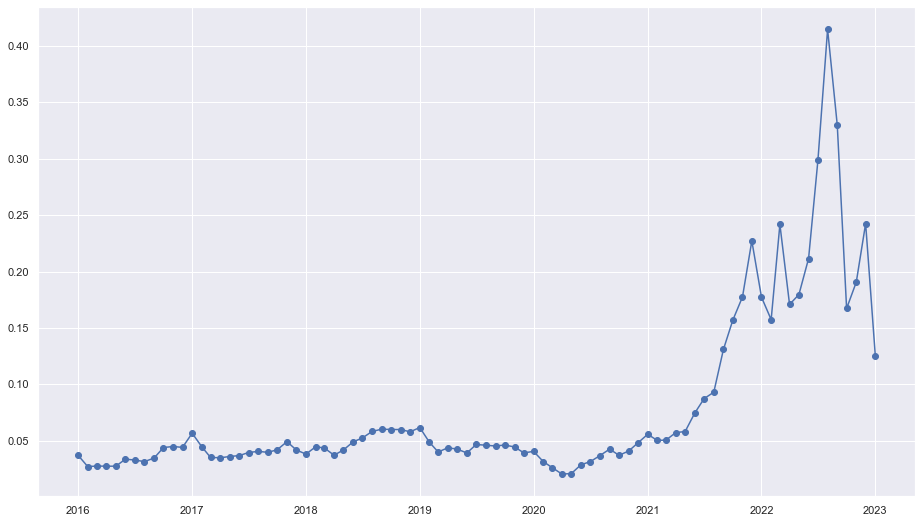

In [5]:
sns.set()
plt.figure(figsize=(14,9))
plt.plot(df['Time'],df['Price(EUR/GWh)'],marker='o')

<AxesSubplot:>

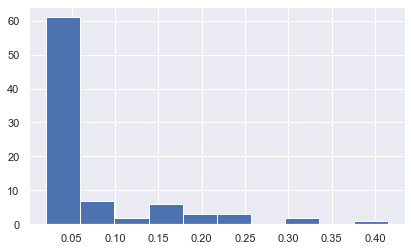

In [6]:
df['Price(EUR/GWh)'].hist()

In [6]:
pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(df.iloc[:,1:-1])

In [7]:
temp = pd.DataFrame(data)
temp.columns = df.columns[1:-1]
temp['Price'] = df.iloc[:,-1]
temp.head()

,Geothermal,Solar,Wind,Other Renewables,Hydro,Combustible Renewables,"Coal, Peat and Manufactured Gases",Natural Gas,Oil and Petroleum Products,Other Combustible Non-Renewables,UNMPR,Price
0,-1.184439,-1.732406,0.105262,-0.784282,1.051854,0.533716,1.780155,0.261032,1.980185,-0.176270,1.851171,0.037164
1,-1.594698,-1.274228,0.162140,-0.784282,1.218532,-0.562802,1.043900,-0.952485,1.117858,-1.280202,1.797401,0.027102
2,-1.028510,-0.581062,-0.724713,-0.784282,1.516980,0.089502,1.267209,-0.565288,1.113073,-0.778193,1.742213,0.027581
3,-1.442498,-0.039774,-1.050369,-0.784282,1.405826,-1.248561,0.437097,-1.425998,0.154769,-1.944274,1.685553,0.027452
4,-1.419804,0.276026,-1.232862,-0.784282,1.201361,-1.384683,0.193131,-1.895887,0.300971,-1.047201,1.685553,0.027448


fasteda.fast_eda(df)

df.columns

temp = df[['Geothermal', 'Solar', 'Wind', 'Other Renewables', 'Hydro',
       'Combustible Renewables', 'Coal, Peat and Manufactured Gases',
       'Natural Gas', 'Oil and Petroleum Products',
       'Other Combustible Non-Renewables', 'UNMPR','Price(EUR/GWh)']]

notime = ['Geothermal', 'Solar', 'Wind', 'Other Renewables', 'Hydro',
       'Combustible Renewables', 'Coal, Peat and Manufactured Gases',
       'Natural Gas', 'Oil and Petroleum Products',
       'Other Combustible Non-Renewables', 'UNMPR','Price(EUR/GWh)']

temp = (temp - temp.mean(axis=0))/temp.std(axis=0)

temp = temp.apply(np.log)

fasteda.fast_eda(temp)

scaler = StandardScaler()
temp.iloc[:,:-1] = scaler.fit_transform(temp.iloc[:,:-1])

temp = pd.DataFrame(temp)
temp.columns = notime
temp.head()

In [8]:
#fasteda.fast_eda(temp)

In [9]:
temp.head()

,Geothermal,Solar,Wind,Other Renewables,Hydro,Combustible Renewables,"Coal, Peat and Manufactured Gases",Natural Gas,Oil and Petroleum Products,Other Combustible Non-Renewables,UNMPR,Price
0,-1.184439,-1.732406,0.105262,-0.784282,1.051854,0.533716,1.780155,0.261032,1.980185,-0.176270,1.851171,0.037164
1,-1.594698,-1.274228,0.162140,-0.784282,1.218532,-0.562802,1.043900,-0.952485,1.117858,-1.280202,1.797401,0.027102
2,-1.028510,-0.581062,-0.724713,-0.784282,1.516980,0.089502,1.267209,-0.565288,1.113073,-0.778193,1.742213,0.027581
3,-1.442498,-0.039774,-1.050369,-0.784282,1.405826,-1.248561,0.437097,-1.425998,0.154769,-1.944274,1.685553,0.027452
4,-1.419804,0.276026,-1.232862,-0.784282,1.201361,-1.384683,0.193131,-1.895887,0.300971,-1.047201,1.685553,0.027448


t_col = ['Solar', 'Wind', 'Other Renewables', 'Hydro',
       'Combustible Renewables', 'Coal, Peat and Manufactured Gases',
       'Natural Gas', 'Oil and Petroleum Products',
       'Other Combustible Non-Renewables', 'UNMPR']

In [15]:
t_col = ['Geothermal',
         'Solar',
         'Wind', 
         'Other Renewables',
         'Hydro',
         'Combustible Renewables',
         'Coal, Peat and Manufactured Gases',
         'Oil and Petroleum Products',
         'Natural Gas',
         'Other Combustible Non-Renewables',
         'UNMPR'
        ]

X = temp[t_col]
y = df['Price(EUR/GWh)']

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(temp[t_col + ['Price']].corr(),annot=True)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = [LinearRegression(),
	          RandomForestRegressor(n_estimators=20,max_features='sqrt',max_depth=5,min_samples_leaf=1,min_samples_split=2),
	          KNeighborsRegressor(n_neighbors=4)
	          ]

In [42]:
TestModels = pd.DataFrame()
tmp = {}
for model in models:
	m = str(model)
	tmp['Model'] = m[:m.index('(')]    
	for i in range(len(Y_train)):
	    model.fit(X_train, Y_train) 
	    tmp['R2_Y%s'%str(i+1)] = r2_score(Y_test, model.predict(X_test))
	TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

In [43]:
TestModels

,R2_Y1,R2_Y2,R2_Y3,R2_Y4,R2_Y5,R2_Y6,R2_Y7,R2_Y8,R2_Y9,R2_Y10,R2_Y11,R2_Y12,R2_Y13,R2_Y14,R2_Y15,R2_Y16,R2_Y17,R2_Y18,R2_Y19,R2_Y20,R2_Y21,R2_Y22,R2_Y23,R2_Y24,R2_Y25,R2_Y26,R2_Y27,R2_Y28,R2_Y29,R2_Y30,R2_Y31,R2_Y32,R2_Y33,R2_Y34,R2_Y35,R2_Y36,R2_Y37,R2_Y38,R2_Y39,R2_Y40,R2_Y41,R2_Y42,R2_Y43,R2_Y44,R2_Y45,R2_Y46,R2_Y47,R2_Y48,R2_Y49,R2_Y50,R2_Y51,R2_Y52,R2_Y53,R2_Y54,R2_Y55,R2_Y56,R2_Y57,R2_Y58,R2_Y59,R2_Y60,R2_Y61,R2_Y62,R2_Y63,R2_Y64,R2_Y65,R2_Y66,R2_Y67,R2_Y68
Model,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LinearRegression,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676,0.772676
RandomForestRegressor,0.787807,0.905410,0.889276,0.848458,0.925177,0.922297,0.843358,0.910258,0.935649,0.852878,0.920599,0.905447,0.872296,0.820512,0.905227,0.876412,0.892231,0.845445,0.936439,0.941468,0.842781,0.882379,0.888883,0.904228,0.919044,0.876741,0.939059,0.919851,0.848384,0.890425,0.870893,0.801820,0.900094,0.839031,0.913644,0.919460,0.900783,0.913905,0.863442,0.900048,0.881536,0.916381,0.938206,0.827688,0.783276,0.905053,0.906800,0.905990,0.917431,0.867122,0.783123,0.931295,0.946244,0.905703,0.905629,0.769989,0.818419,0.863197,0.877403,0.938956,0.886163,0.802806,0.867448,0.916671,0.946365,0.880051,0.903135,0.869329
KNeighborsRegressor,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512,0.893512


<AxesSubplot:title={'center':'R2_Y1'}, xlabel='Model'>

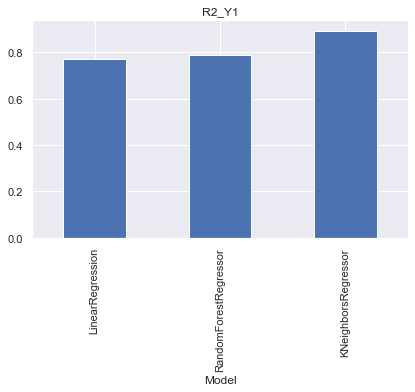

In [44]:
TestModels.R2_Y1.plot(kind='bar', title='R2_Y1')

In [ ]:
df.describe()

In [ ]:
cll = LinearRegression()

cll.fit(X_train,Y_train)

print('Train score:',cll.score(X_train,Y_train))

print('Test score:',cll.score(X_test,Y_test))

t = cll.predict(X_test)

res = pd.DataFrame({'Real':pd.concat([Y_test,Y_train]),'Pred':cll.predict(pd.concat([X_test,X_train]))})

res['Time'] = df.Time.copy()

res = res.sort_values(by='Time')

plt.figure(figsize=(14,9))
plt.plot(res['Time'],res['Real'])
plt.plot(res['Time'],res['Pred'])
plt.legend(['Real','Pred'])

In [ ]:
clf = RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=5,min_samples_leaf=1,min_samples_split=2)

In [ ]:
clf.fit(X_train,Y_train)

In [ ]:
clf.score(X_train,Y_train)

In [ ]:
clf.score(X_test,Y_test)

In [ ]:
res = pd.DataFrame({'Real':pd.concat([Y_test,Y_train]),'Pred':clf.predict(pd.concat([X_test,X_train]))})

In [ ]:
res.head()

In [ ]:
res['Time'] = df.Time.copy()

In [ ]:
res = res.sort_values(by='Time')

In [ ]:
sns.set()
plt.figure(figsize=(14,9))
plt.plot(res['Time'],res['Real'])
plt.plot(res['Time'],res['Pred'])
plt.legend(['Real','Pred'])

for i in range(10,201,10):
    clf = RandomForestRegressor(n_estimators=i,max_features='sqrt',max_depth=2,min_samples_leaf=2,min_samples_split=9)
    clf.fit(X_train,Y_train)
    
    res = pd.DataFrame({'Real':pd.concat([Y_test,Y_train]),'Pred':clf.predict(pd.concat([X_test,X_train]))})
    res['Time'] = df.Time.copy()
    res = res.sort_values(by='Time')
    
    plt.figure(figsize=(7,4))
    plt.plot(res['Time'],res['Real'])
    plt.plot(res['Time'],res['Pred'])
    plt.legend(['Real','Pred'])
    plt.title(f'n_estimators={i}\nTrain score: {clf.score(X_train,Y_train)}\nTest score: {clf.score(X_test,Y_test)}')
    #print(f'Train score: {clf.score(X_train,Y_train)}')
    #print(f'Test score: {clf.score(X_test,Y_test)}')

In [ ]:
clf = RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=5,min_samples_leaf=1,min_samples_split=2)
clf.fit(X_train,Y_train)
    
res = pd.DataFrame({'Real':pd.concat([Y_test,Y_train]),'Pred':clf.predict(pd.concat([X_test,X_train]))})
res['Time'] = df.Time.copy()
res = res.sort_values(by='Time')

In [ ]:
res.head()

In [ ]:
plt.figure(figsize=(14,9))
w=np.hanning(45)
y2=np.convolve(w/w.sum(),res['Pred'],mode='same')
y1=np.convolve(w/w.sum(),res['Real'],mode='same')
plt.plot(res['Time'],res['Real'],marker='o')
plt.plot(res['Time'],y2)
plt.legend(['Real','Pred_smooth'])
plt.title(f'Train score: {clf.score(X_train,Y_train)}\nTest score: {clf.score(X_test,Y_test)}')

In [ ]:
df[df['Time'].between('2021-01-01','2023-01-01')]

In [45]:
def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

# Tune parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

NameError: name 'RandomForestRegressor' is not defined

In [65]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [67]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [68]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error: 0.0106 degrees.
Accuracy = 84.72%.
Model Performance
Average Error: 0.0137 degrees.
Accuracy = 77.57%.


In [69]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, Y_train)
best_grid = grid_search.best_estimator_

In [71]:
grid_accuracy = evaluate(best_grid, X_test, Y_test)

Model Performance
Average Error: 0.0188 degrees.
Accuracy = 72.83%.


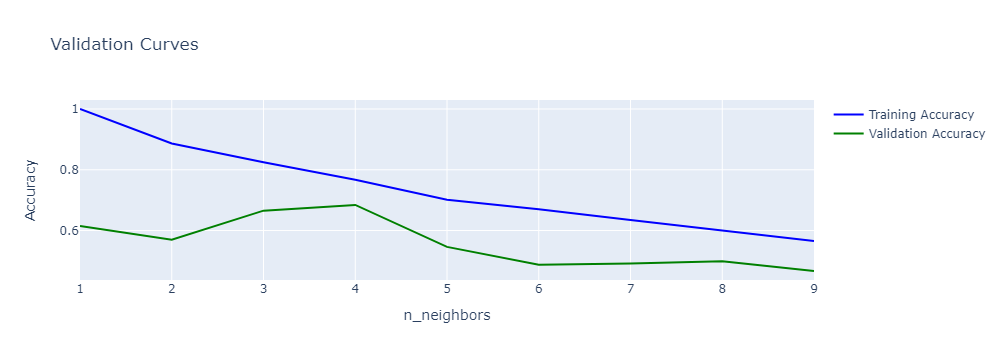

In [ ]:
param_range = np.arange(1, 10, 1)
#clf = RandomForestRegressor(max_features='sqrt',max_depth=11,min_samples_leaf=2,min_samples_split=9,random_state=42)
clf = KNeighborsRegressor()
plot_validation_curves(clf, X_train, Y_train, "n_neighbors", param_range, 5)

Train score:  0.8271850342665639
Test score:  0.8935123407714924


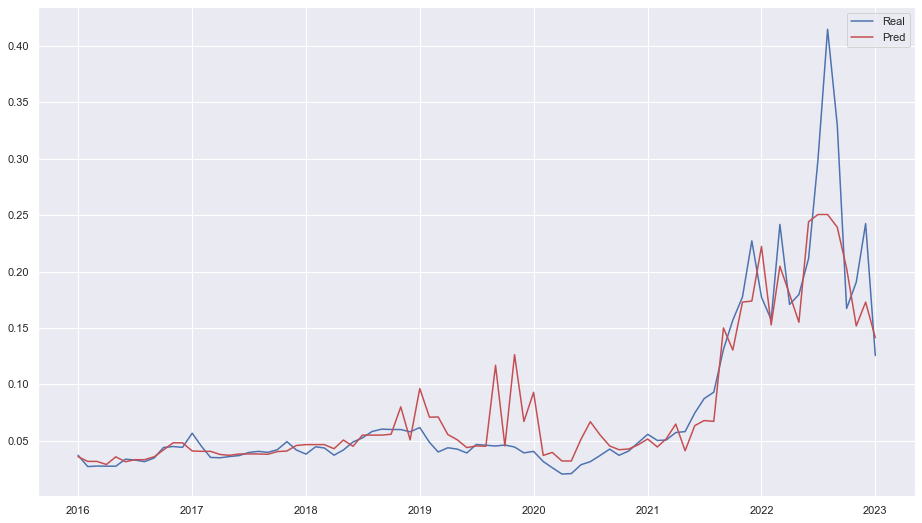

In [ ]:
clf = KNeighborsRegressor(n_neighbors=4)
clf.fit(X_train,Y_train)

print('Train score: ',clf.score(X_train,Y_train))
print('Test score: ',clf.score(X_test,Y_test))

res = pd.DataFrame({'Real':pd.concat([Y_test,Y_train]),'Pred':clf.predict(pd.concat([X_test,X_train]))})
res['Time'] = df.Time.copy()
res = res.sort_values(by='Time')

sns.set()
plt.figure(figsize=(14,9))
plt.plot(res['Time'],res['Real'],c='b')
plt.plot(res['Time'],res['Pred'],c = 'r')
plt.legend(['Real','Pred'])

#Probably overfitting ;(

# GridSearchCV to choose the best params

param_grid = {'n_estimators':np.arange(100,200,15),'max_depth':np.arange(1,12,4),'min_samples_split':np.arange(2,15,4),'min_samples_leaf':np.arange(1,10,3)}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=7)

grid.fit(X_train,Y_train)

grid.best_params_

model = grid.best_estimator_

#plt.scatter(df['Time'], Y_train)
model.fit(X_train, Y_train)
print('Train score: ',model.score(X_train,Y_train))
print('Test score: ',model.score(X_test,Y_test))
#plt.plot(df['Time'], y_test, hold=True);

res = pd.DataFrame({'Real':pd.concat([Y_test,Y_train]),'Pred':model.predict(pd.concat([X_test,X_train]))})
res['Time'] = df.Time.copy()
res = res.sort_values(by='Time')

sns.set()
plt.figure(figsize=(14,9))
plt.plot(res['Time'],res['Real'],c='r')
plt.plot(res['Time'],res['Pred'])
plt.legend(['Real','Pred'])

# Mean Absolute Error
### Keep trying to prevent overfiting ;)

In [48]:
def plot_mae(X,y,n_spl = 4):
    kf = KFold(n_splits=n_spl)
    mae_train = []
    mae_test = []
    for train_index, test_index in kf.split(X):

       X_train, X_test = X.iloc[train_index], X.iloc[test_index]
       y_train, y_test = y[train_index], y[test_index]
       model = KNeighborsRegressor(n_neighbors=4)
       #model = RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=5,min_samples_leaf=1,min_samples_split=2,random_state=42)
       #model = LinearRegression()
       #model = Ridge(alpha=0.1)
       model.fit(X_train, y_train)
       y_train_pred = model.predict(X_train)
       y_test_pred = model.predict(X_test)
       mae_train.append(mean_absolute_error(y_train, y_train_pred))
       mae_test.append(mean_absolute_error(y_test, y_test_pred))
        
    folds = range(1, kf.get_n_splits() + 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='train')
    plt.plot(folds, mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

In [ ]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)

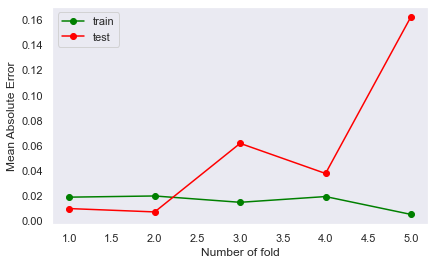

In [50]:
plot_mae(X,y,5)